<a href="https://colab.research.google.com/github/jhalani1999/Forest-fire-in-Brazil/blob/master/forest_fires_in_brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [35]:
#data contains spanish alphabets
dataframe_original = pd.read_csv(r"/content/amazon.csv",  encoding = "ISO-8859-1")

#Month written in the spanish, Converted to the English
dataframe_original = dataframe_original.replace(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho','Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
                                                ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

#removing the ambiguous decimal point which should have been treated as a thousand's comma
for i in range(len(dataframe_original)):
  if(dataframe_original['number'].iloc[i]-int(dataframe_original['number'].iloc[i])!=0):
    dataframe_original['number'].iloc[i] = dataframe_original['number'].iloc[i]*1000

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
df_month = dataframe_original.groupby('month',sort=False).sum().reset_index()

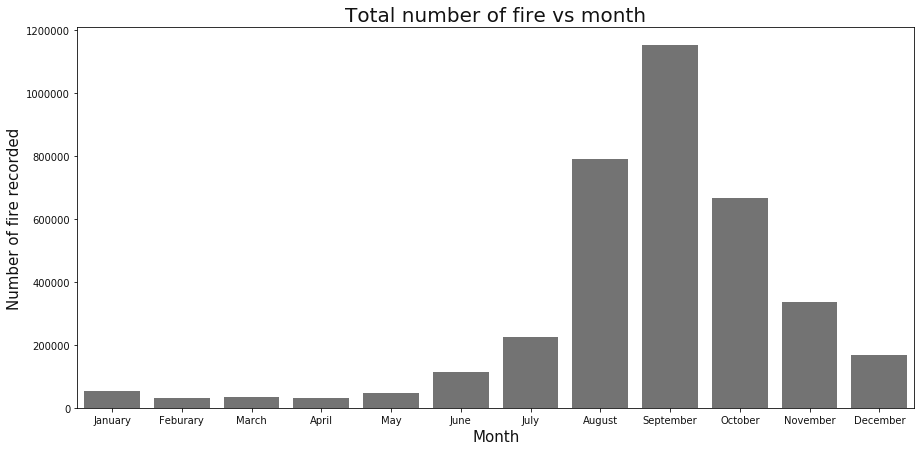

In [37]:
plt.figure(figsize=(15,7))
sns.barplot(x=df_month['month'], y=df_month['number'], color="#737373")
plt.xticks(color="#121212")
plt.yticks(color="#121212")
plt.xlabel('Month', fontsize=15, color="#121212")
plt.ylabel('Number of fire recorded', fontsize=15, color="#121212")
plt.title(label="Total number of fire vs month", fontsize=20, color="#121212")
plt.show()

# Conclusion from this Plot
*The above plot indicate that most of the fires occur in the latter half of the year, however, there is a possibility that in some areas where lesser fires are recorded, the number of fires may be more in the first half..*

In [0]:
df_state = dataframe_original.loc[:,['state','number']].groupby('state').sum().reset_index()
sorted_df = df_state.sort_values(['number'])

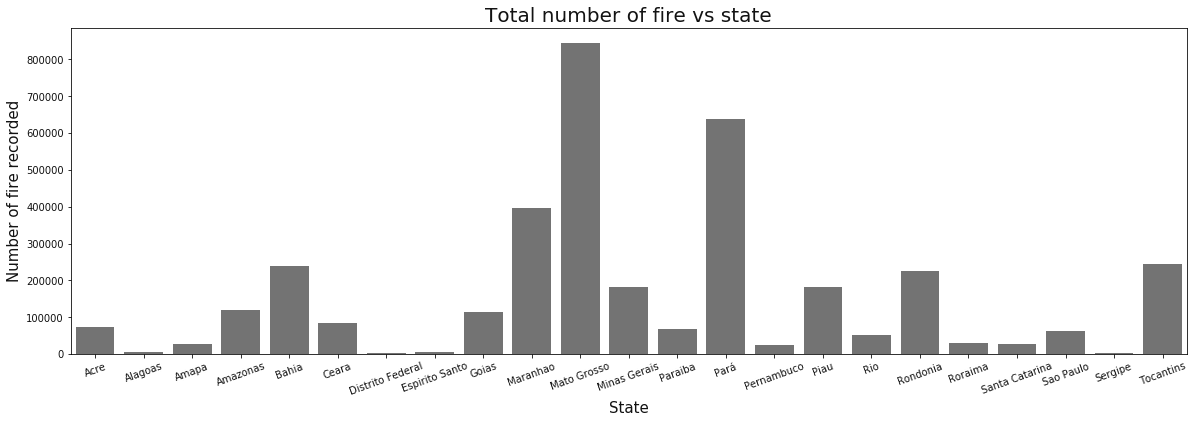

In [39]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=20)
sns.barplot(x=df_state['state'], y=df_state['number'], color="#737373")
plt.xticks(color="#121212")
plt.yticks(color="#121212")
plt.xlabel('State', fontsize=15, color="#121212")
plt.ylabel('Number of fire recorded', fontsize=15, color="#121212")
plt.title(label="Total number of fire vs state", fontsize=20, color="#121212")
plt.show()

# CONCLUSION FROM THIS PLOT
**Maximum number of fires recored at Mato Grosso, followed by Para, minimum number of fires recored at Sergipe.**

In [0]:
df_month_state = dataframe_original.groupby(['state','month'],sort=False).sum().reset_index()

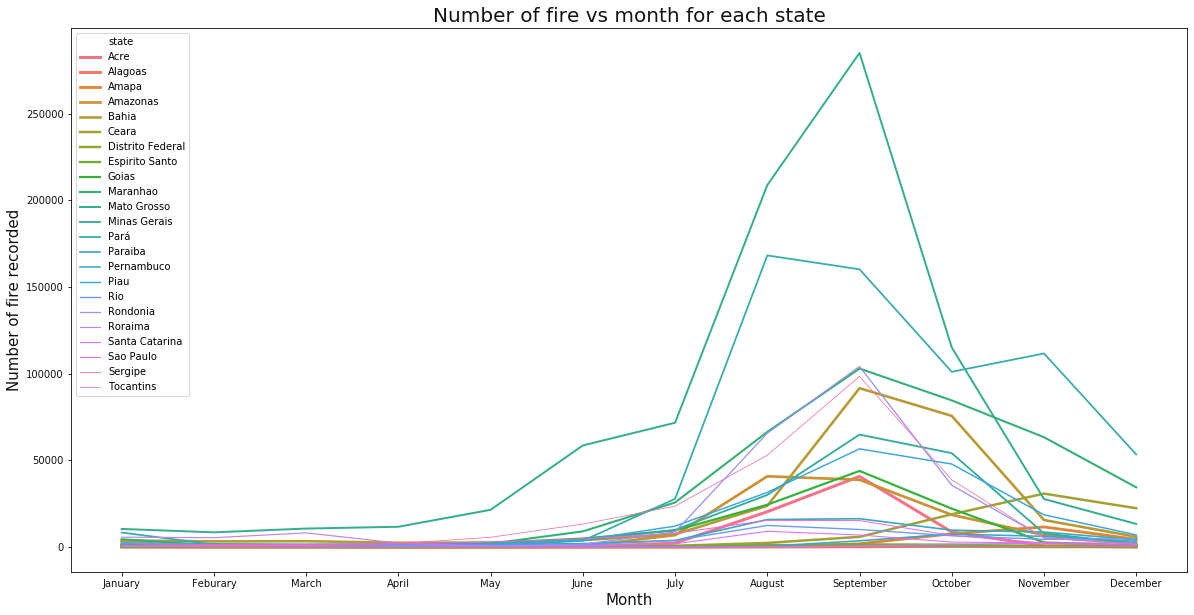

In [42]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df_month_state['month'], y=df_month_state['number'], hue=df_month_state['state'], size=df_month_state['state'], dashes=True, sort=False)
plt.xticks(color="#121212")
plt.yticks(color="#121212")
plt.xlabel('Month', fontsize=15, color="#121212")
plt.ylabel('Number of fire recorded', fontsize=15, color="#121212")
plt.title(label="Number of fire vs month for each state", fontsize=20, color="#121212")
plt.show()

# Conclusion from this Plot
**Where greater number of fire occurs we can confirm that majority of fire is recorded on the later half of the year, as per where lesser number of fire occurs we are not able to tell from this plot.**

In [0]:
sorted_df['state'].unique()
state_10=[]
for i in range(10):
  state_10.append(sorted_df['state'].iloc[i])

In [0]:
df_month_state_low = df_month_state[df_month_state['state'].isin(state_10)]

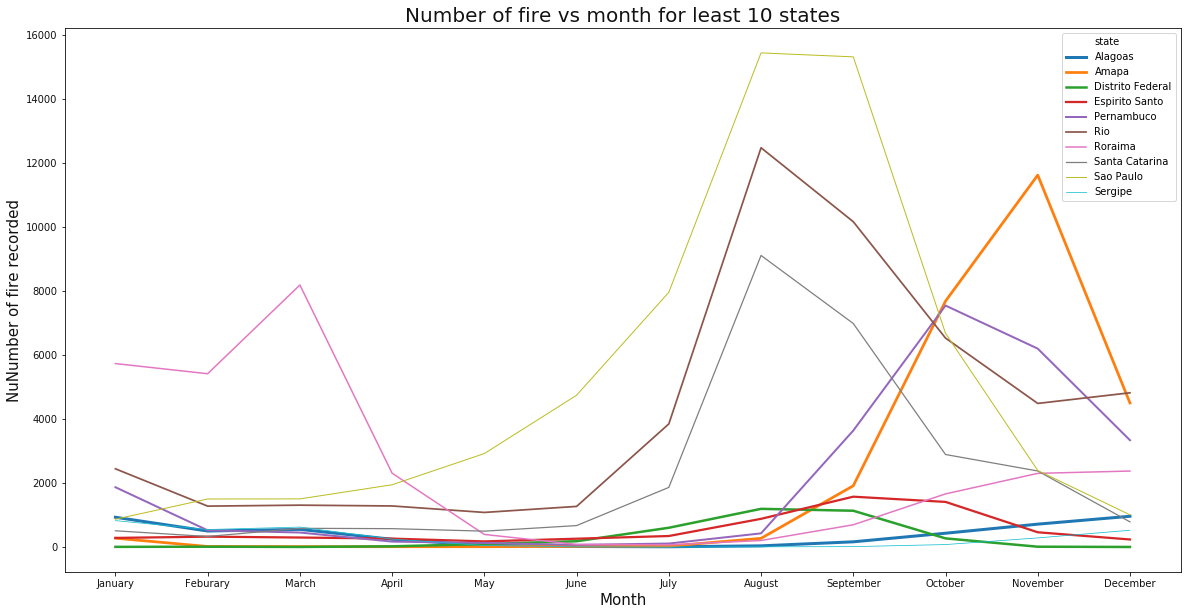

In [45]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df_month_state_low['month'], y=df_month_state_low['number'], hue=df_month_state_low['state'], size=df_month_state_low['state'], sort=False)
plt.xticks(color="#121212")
plt.yticks(color="#121212")
plt.xlabel('Month', fontsize=15, color="#121212")
plt.ylabel('NuNumber of fire recorded', fontsize=15, color="#121212")
plt.title(label="Number of fire vs month for least 10 states", fontsize=20, color="#121212")
plt.show()

# Conclusion from this Plot
**Our assumption is true there are some states where more fire occurs at first half of the year. Like Roraima more fires occurs in first half, but for Alagoas its hard to tell.**



In [46]:
df_alagoas = dataframe_original[dataframe_original['state']=='Alagoas']
scale_mapper_month = {'January':1, 'Feburary':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
       'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df_alagoas = df_alagoas.replace({'month':scale_mapper_month})
first, second = 0, 0
for i in range (len(df_alagoas)):
  if(df_alagoas['month'].iloc[i]<=6):
    first = first + df_alagoas['number'].iloc[i]
  else:
    second = second + df_alagoas['number'].iloc[i]
if(first<second):
  print("Second half of the year has more no. of fire.")
elif(first==second):
  print("Both half of the year has equal no. of fire.")
else:
  print("First half of the year has more no. of fire.")

first, second

Second half of the year has more no. of fire.


(2311.0, 2333.0)

**Now we conclude that there is only one state where more fires occurs in first half.**

In [0]:
df_year = dataframe_original.groupby('year').sum().reset_index()

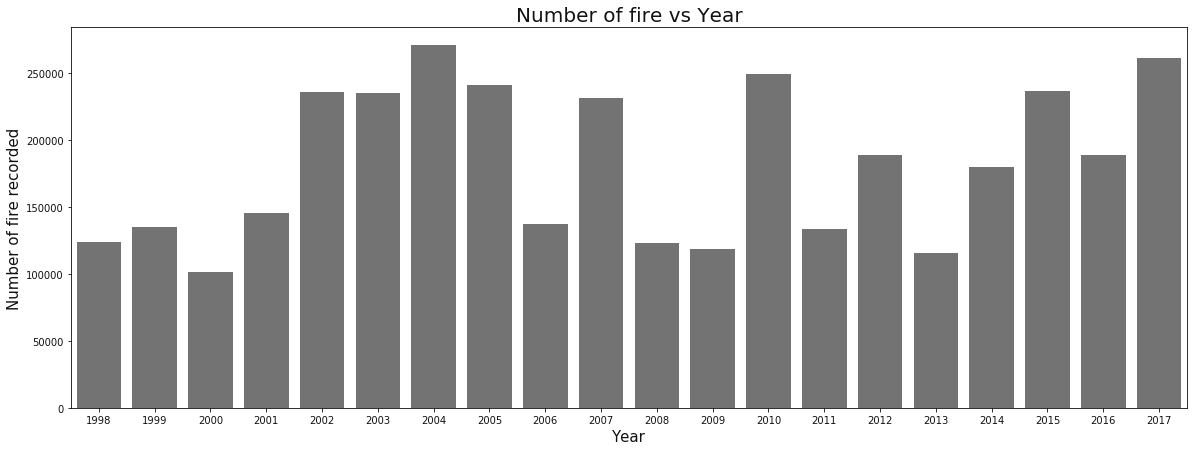

In [49]:
plt.figure(figsize=(20,7))
plt.xticks(np.arange(1998, 2018, 1))
sns.barplot(x = df_year['year'], y = df_year['number'], color="#737373")
plt.xticks(color="#121212")
plt.yticks(color="#121212")
plt.xlabel('Year', fontsize=15, color="#121212")
plt.ylabel('Number of fire recorded', fontsize=15, color="#121212")
plt.title(label = 'Number of fire vs Year', fontsize=20, color="#121212")
plt.show()

# Conclusion from this Plot
**Maximum number of fire recorded in 2004, minimum number of fire recorded in 2000.**

In [0]:
df_year_month = dataframe_original.groupby(['year','month'],sort=False).sum().reset_index()

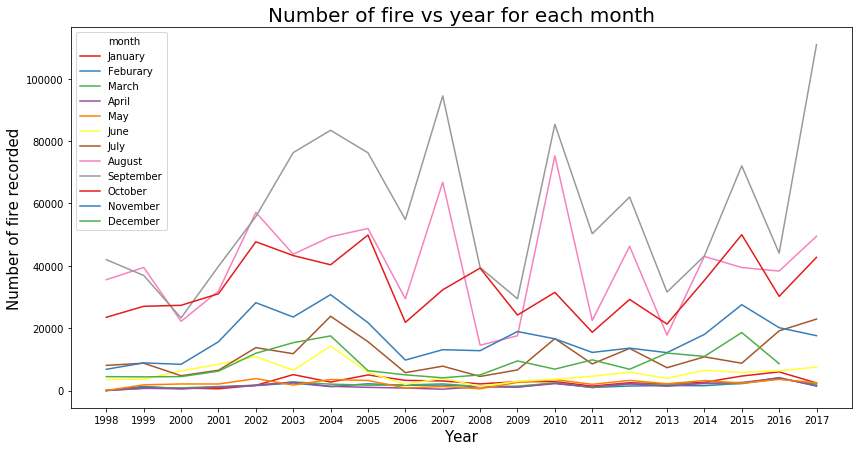

In [51]:
plt.figure(figsize=(14,7))
plt.xticks(np.arange(1998, 2018, 1))
palette = sns.color_palette("Set1",12)
sns.lineplot(x = df_year_month['year'], y = df_year_month['number'], hue=df_year_month['month'], legend='full', palette=palette, sort=False)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of fire recorded', fontsize=15)
plt.title(label = "Number of fire vs year for each month", fontsize=20)
plt.show()

# Conclusion from this plot
**Most of the years, month number 9 has most number of fires, except in year 2000.**

In [0]:
df_month_mean = dataframe_original.groupby('month',sort=False).mean().reset_index()

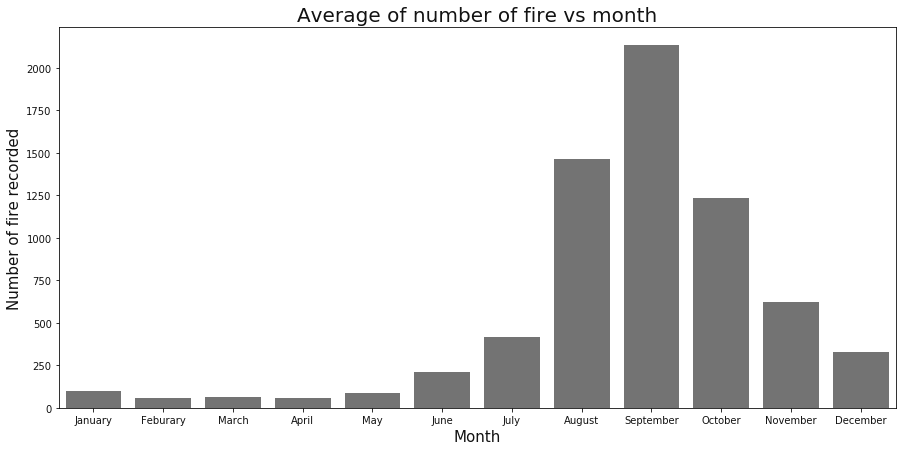

In [54]:
plt.figure(figsize=(15,7))
sns.barplot(x=df_month_mean['month'],y=df_month_mean['number'], color="#737373")
plt.xticks(color="#121212")
plt.yticks(color="#121212")
plt.xlabel('Month', fontsize=15, color="#121212")
plt.ylabel('Number of fire recorded', fontsize=15, color="#121212")
plt.title(label = "Average of number of fire vs month", fontsize=20, color="#121212")
plt.show()

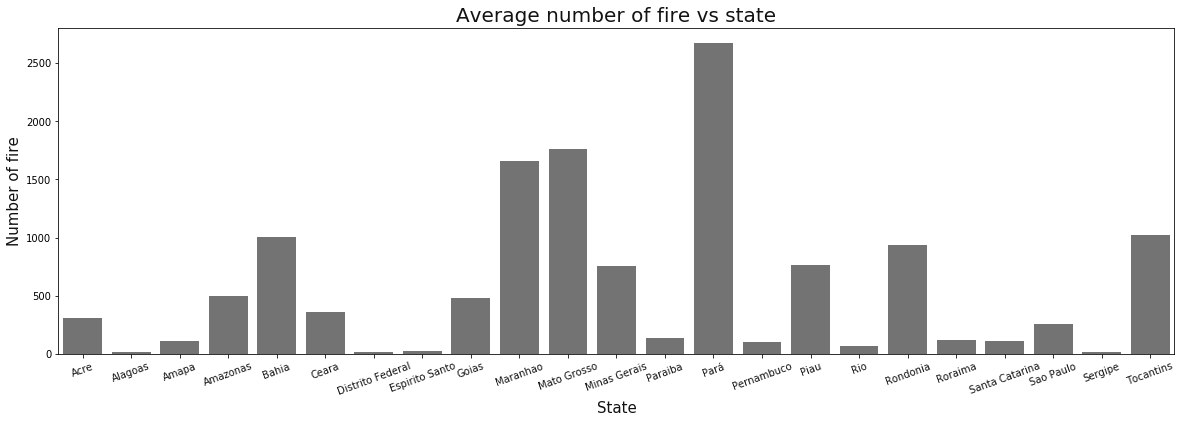

In [55]:
df_state_mean = dataframe_original.loc[:,['state','number']].groupby('state').mean().reset_index()
sorted_df_mean = df_state_mean.sort_values(['number'])
plt.figure(figsize=(20,6))
plt.xticks(rotation=20, color="#121212")
sns.barplot(x=df_state_mean['state'],y=df_state_mean['number'], color="#737373")
plt.xlabel('State', fontsize=15, color="#121212")
plt.ylabel('Number of fire', fontsize=15, color="#121212")
plt.title(label = "Average number of fire vs state", fontsize=20, color="#121212")
plt.show()

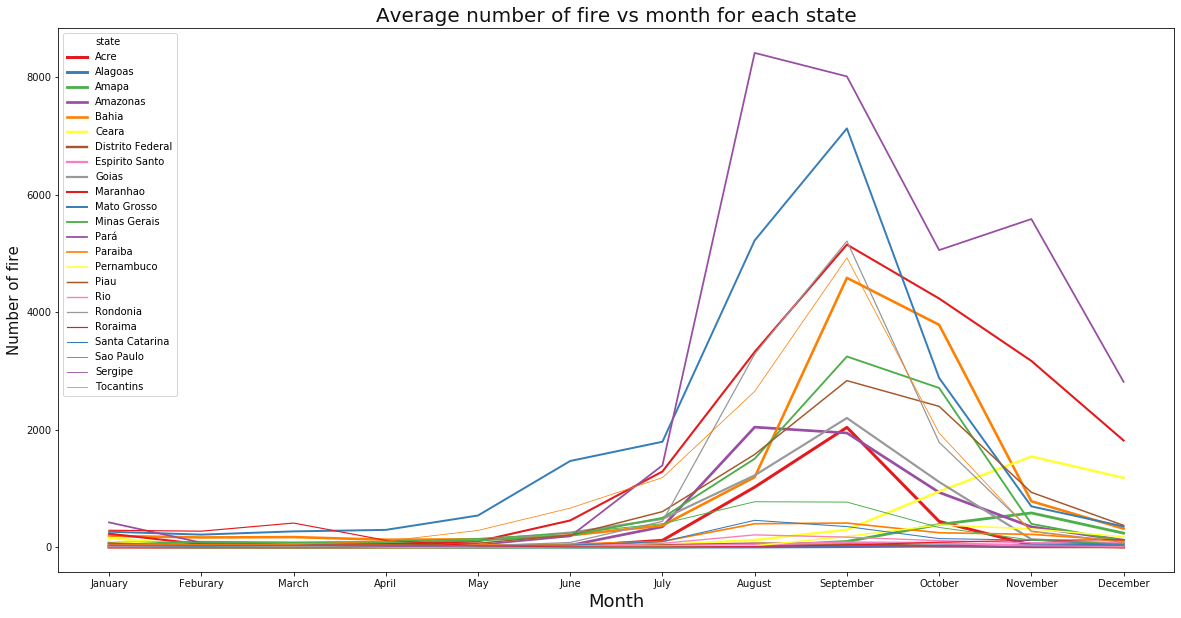

In [57]:
df_month_state_mean = dataframe_original.groupby(['state','month'],sort=False).mean().reset_index()
plt.figure(figsize=(20,10))
palette = sns.color_palette("Set1",23)
sns.lineplot(x=df_month_state_mean['month'], y=df_month_state_mean['number'], hue=df_month_state_mean['state'], palette=palette, size=df_month_state_mean['state'], dashes=True, sort=False)
plt.xticks(color="#121212")
plt.yticks(color="#121212")
plt.xlabel('Month', fontsize=18, color="#121212")
plt.ylabel('Number of fire', fontsize=15, color="#121212")
plt.title(label = "Average number of fire vs month for each state", fontsize=20, color="#121212")
plt.show()

# Conclusion from this plot
**As we seen from the Sum plot of month vs number between state, Mato Grosso has more total number of fire but from tha we cannot say that on an every month of every year it has more number of fire, maybe from some factors there has been more number of fires in that particular year. But from the mean we can say that on average Para has more number fire, followed by Mato Grosso.**

In [0]:
sorted_df_mean['state'].unique()
state_10_mean=[]
for i in range(10):
  state_10_mean.append(sorted_df_mean['state'].iloc[i])

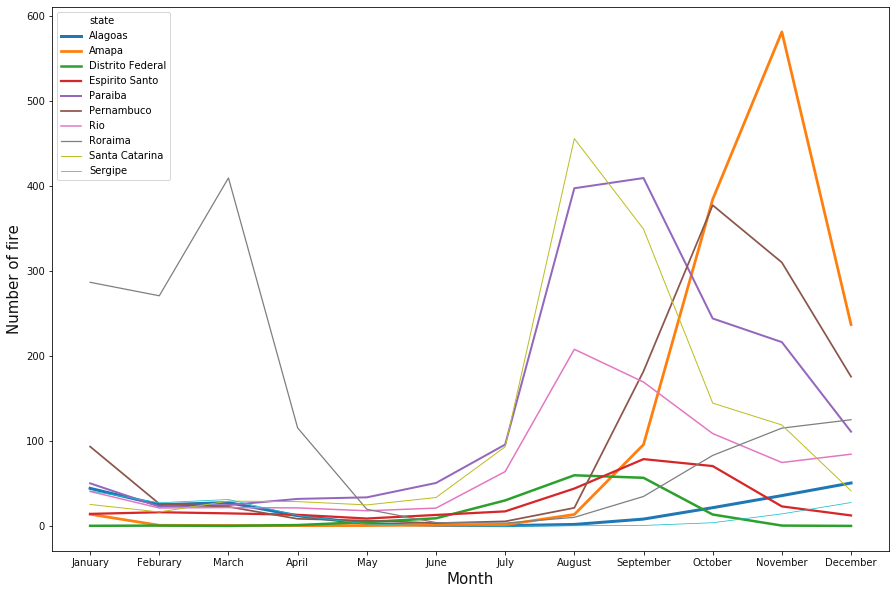

In [59]:
df_month_state_low_mean = df_month_state_mean[df_month_state_mean['state'].isin(state_10_mean)]
plt.figure(figsize=(15,10))
sns.lineplot(x=df_month_state_low_mean['month'], y=df_month_state_low_mean['number'], hue=df_month_state_low_mean['state'], size=df_month_state_low_mean['state'], sort=False)
plt.xticks(color="#121212")
plt.yticks(color="#121212")
plt.xlabel('Month', fontsize=15, color="#121212")
plt.ylabel('Number of fire', fontsize=15, color="#121212")
plt.show()

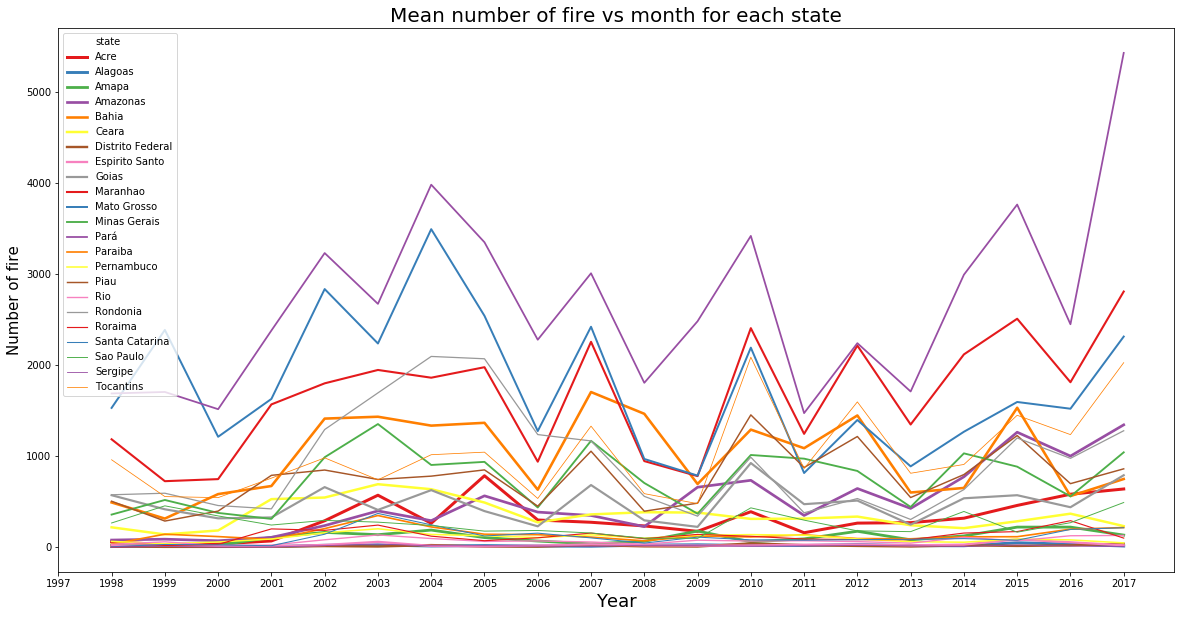

In [0]:
df_year_state_mean = dataframe_original.groupby(['state','year'],sort=False).mean().reset_index()
plt.figure(figsize=(20,10))
palette = sns.color_palette("Set1",23)
sns.lineplot(x=df_year_state_mean['year'], y=df_year_state_mean['number'], hue=df_year_state_mean['state'], palette=palette, size=df_year_state_mean['state'], dashes=True, sort=False)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of fire', fontsize=15)
plt.xticks(np.linspace(1997,2017,21))
plt.title(label = "Mean number of fire vs month for each state", fontsize=20)
plt.show()

In [0]:
df_year_mean = dataframe_original.groupby('year').mean().reset_index()

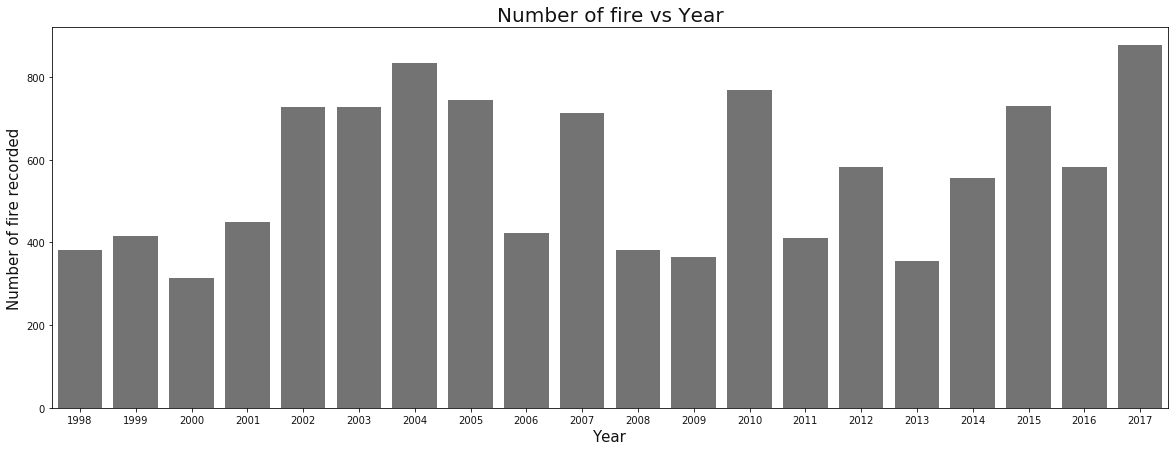

In [65]:
plt.figure(figsize=(20,7))
plt.xticks(np.arange(1998, 2018, 1))
sns.barplot(x = df_year_mean['year'], y = df_year_mean['number'], color="#737373")
plt.xticks(color="#121212")
plt.yticks(color="#121212")
plt.xlabel('Year', fontsize=15, color="#121212")
plt.ylabel('Number of fire recorded', fontsize=15, color="#121212")
plt.title(label = 'Number of fire vs Year', fontsize=20, color="#121212")
plt.show()

In [0]:
from itertools import product
from scipy.stats import spearmanr, pearsonr

df_year_state_mean = dataframe_original.groupby(['state','year'],sort=False).mean().reset_index()
states = df_year_state_mean['state'].unique()
combination = product(states, repeat=2)
cor=[]
cor_state1 = []
cor_state2 = []
for c in list(combination):
  x = df_year_state_mean[df_year_state_mean['state']==c[0]]['number']
  y = df_year_state_mean[df_year_state_mean['state']==c[1]]['number']
  r, _ = spearmanr(x,y)
  cor.append(r)
  cor_state1.append(c[0])
  cor_state2.append(c[1])
cor_state = pd.concat([pd.DataFrame(cor,columns=['r']),pd.DataFrame(cor_state1,columns=['state1']),pd.DataFrame(cor_state2,columns=['state2'])],axis=1)

(0.3801530012627774, 1.0)

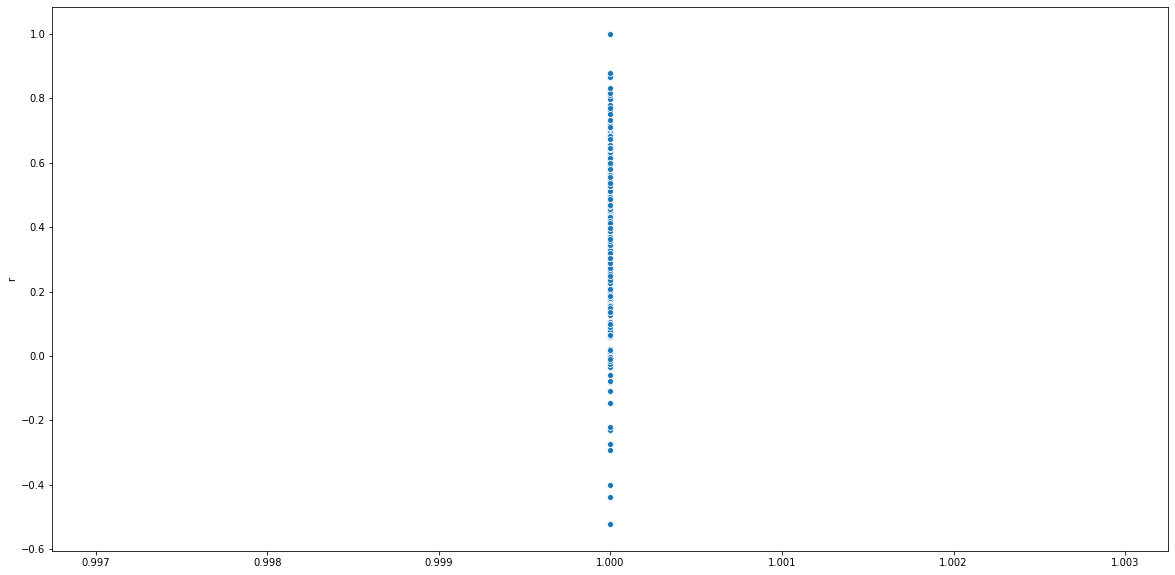

In [63]:
from statistics import mean
plt.figure(figsize=(20,10))
sns.scatterplot(y=cor_state['r'],x=1)
mean(cor_state['r']),max(cor_state['r'])

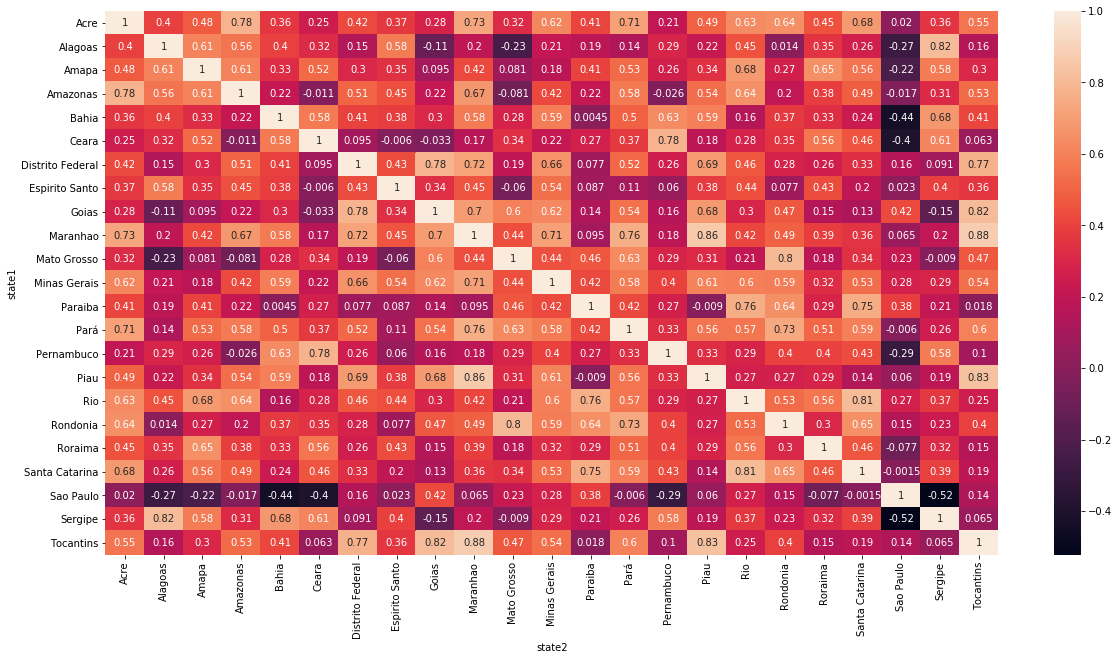

In [64]:
plt.figure(figsize=(20,10))
heatmap_state = cor_state.pivot('state1','state2','r')
ax = sns.heatmap(heatmap_state,annot=True)